# Zhou Guanyu
<img src="https://www.formula1.com/content/fom-website/en/drivers/guanyu-zhou/_jcr_content/image.img.1920.medium.jpg/1646818979975.jpg" width="300">

### Team: Alfa Romeo
<img src ="https://www.formula1.com/content/fom-website/en/drivers/guanyu-zhou/_jcr_content/helmet.img.png/1646825005506.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

zho_laps <- lap_data %>%
            filter(driverId == 855)

# Filtering Lap Data for ALFA ROMEO
romeo_lap <- lap_data %>%
             filter(driverId %in% c(8, 841, 9))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1011,169
1045,112
1052,111
949,57
971,57
990,35


`geom_smooth()` using formula 'y ~ x'



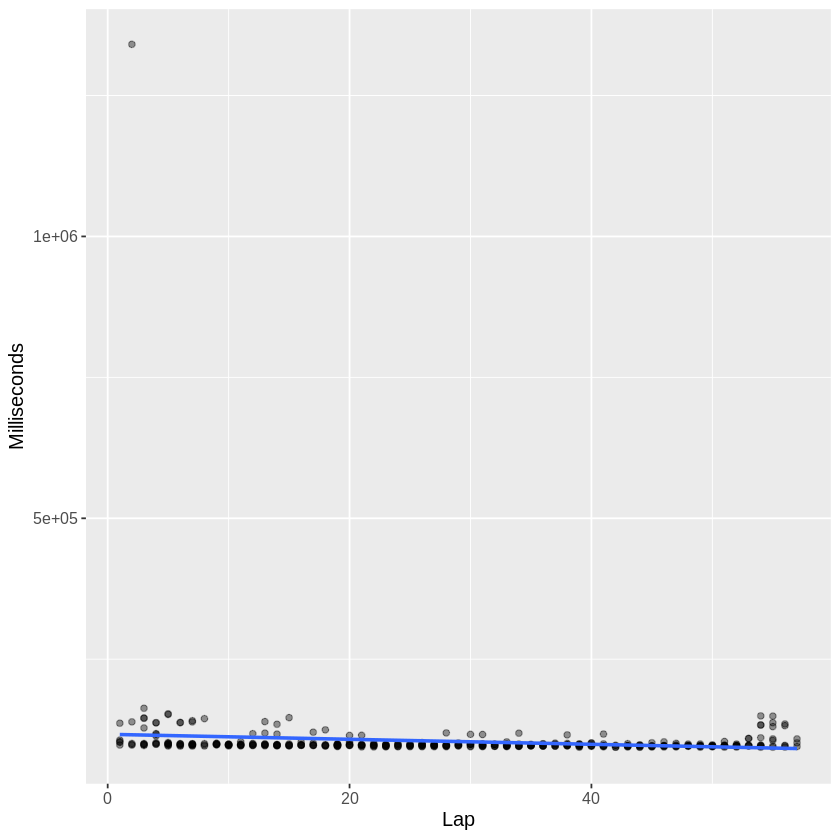

In [5]:
set.seed(2022)

#1. Bahrain 

zg_bahrain <- romeo_lap %>%
                filter(raceId %in% bahrain_race_ID) 

zg_bahrain_clean <- zg_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_bahrain_clean
zg_bahrain_clean_ID <- zg_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_bahrain_races <- romeo_lap %>%
                    filter(raceId %in% zg_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 1

initiate_rmse() 

## GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,130
1054,66


`geom_smooth()` using formula 'y ~ x'



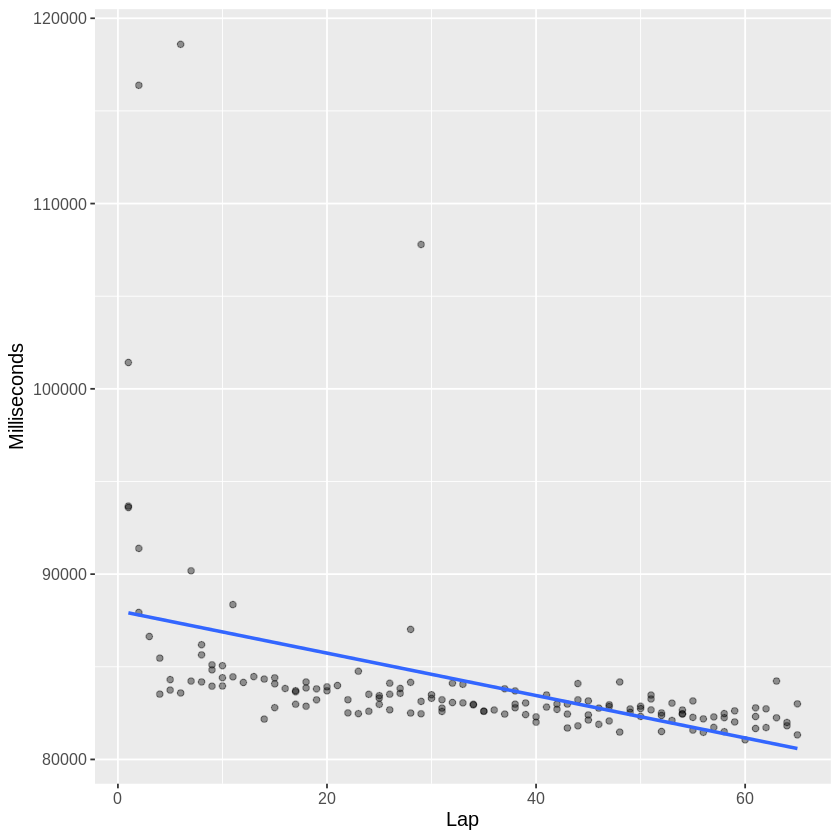

In [6]:
set.seed(2022)

#2. Portimão

zg_Portimão <- romeo_lap %>%
                filter(raceId %in% Portimão_race_ID) 

zg_Portimão_clean <- zg_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_Portimão_clean
zg_Portimão_clean_ID <- zg_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_Portimão_races <- romeo_lap %>%
                    filter(raceId %in% zg_Portimão_clean_ID) 

formulaone_split <- initial_split(zg_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,169
969,112
989,58
948,21


`geom_smooth()` using formula 'y ~ x'



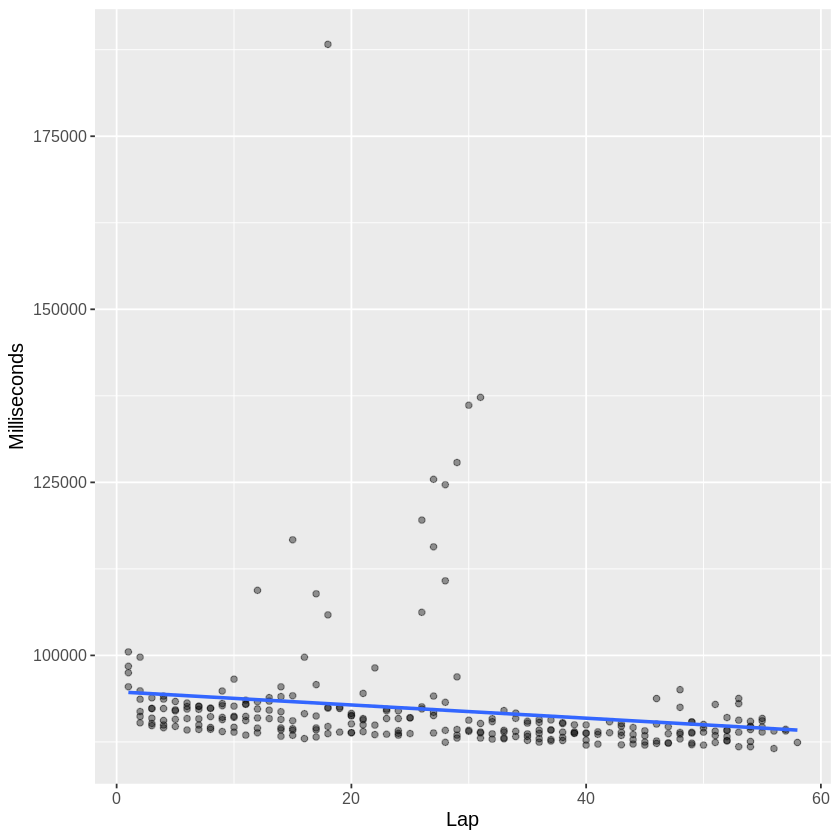

In [7]:
set.seed(2022)

#3. Australia

zg_aus <- romeo_lap %>%
                filter(raceId %in% aus_race_ID) 

zg_aus_clean <- zg_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_aus_clean
zg_aus_clean_ID <- zg_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_aus_races <- romeo_lap %>%
                    filter(raceId %in% zg_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

## GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,126
1053,125


`geom_smooth()` using formula 'y ~ x'



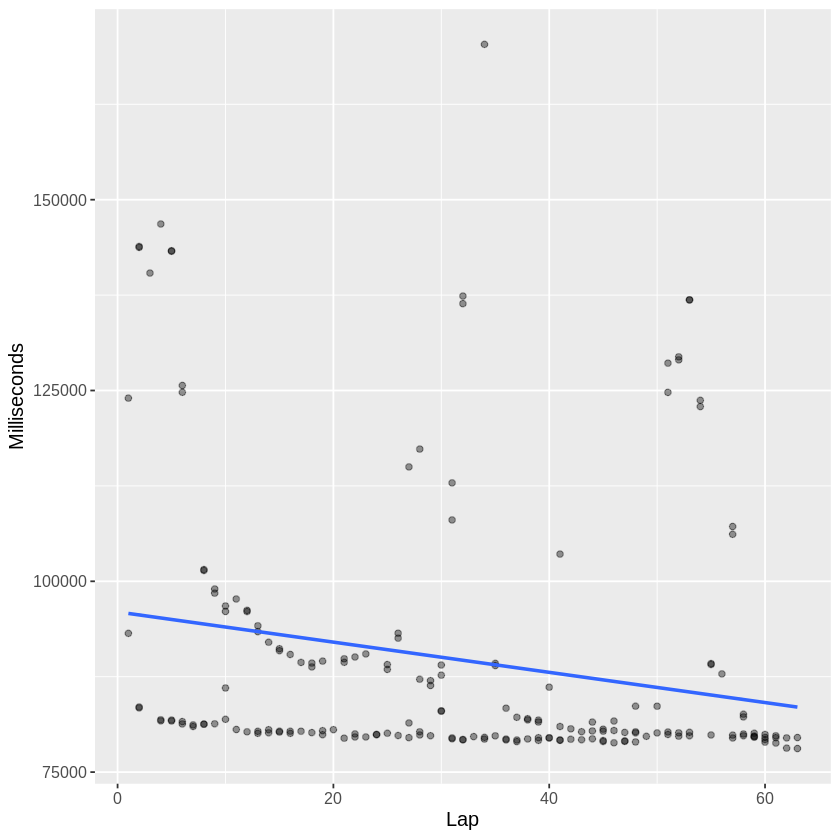

In [8]:
set.seed(2022)

#4. Italy, Imola

zg_imola <- romeo_lap %>%
                filter(raceId %in% imola_race_ID) 

zg_imola_clean <- zg_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_imola_clean
zg_imola_clean_ID <- zg_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_imola_races <- romeo_lap %>%
                    filter(raceId %in% zg_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

## GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,114
1044,68


`geom_smooth()` using formula 'y ~ x'



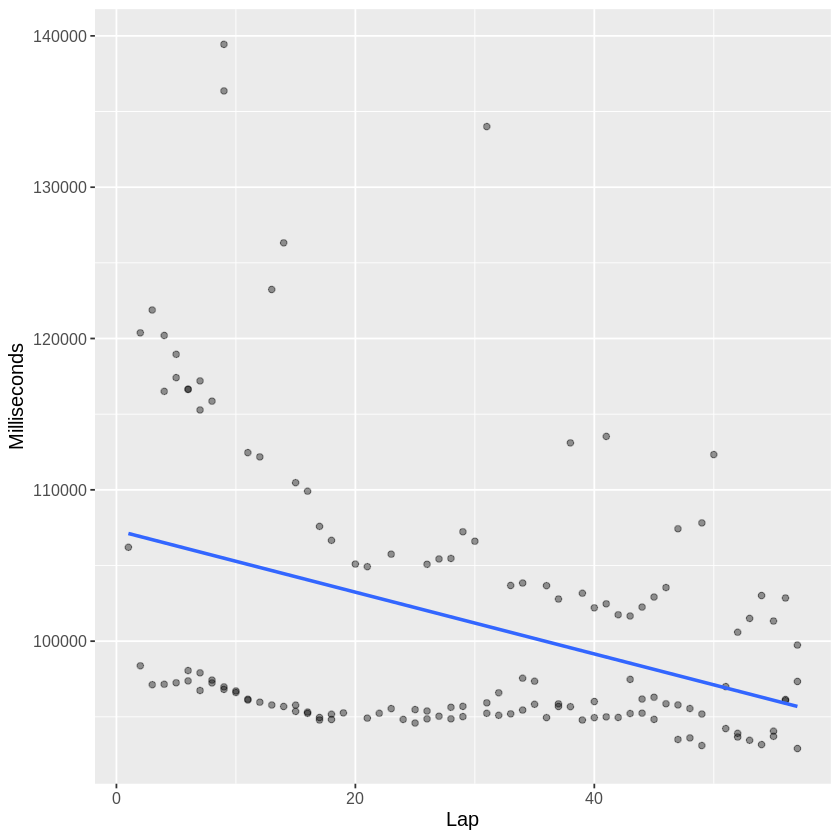

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

zg_turkey <- romeo_lap %>%
                filter(raceId %in% turkey_race_ID) 

# test <- zg_turkey %>%
#         group_by(raceId, driverId) %>%
#         summarize(n = n())

zg_turkey_clean <- zg_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_turkey_clean
zg_turkey_clean_ID <- zg_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_turkey_races <- romeo_lap %>%
                    filter(raceId %in% zg_turkey_clean_ID)

formulaone_split <- initial_split(zg_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,197
1036,130
1055,130
952,66
993,25


`geom_smooth()` using formula 'y ~ x'



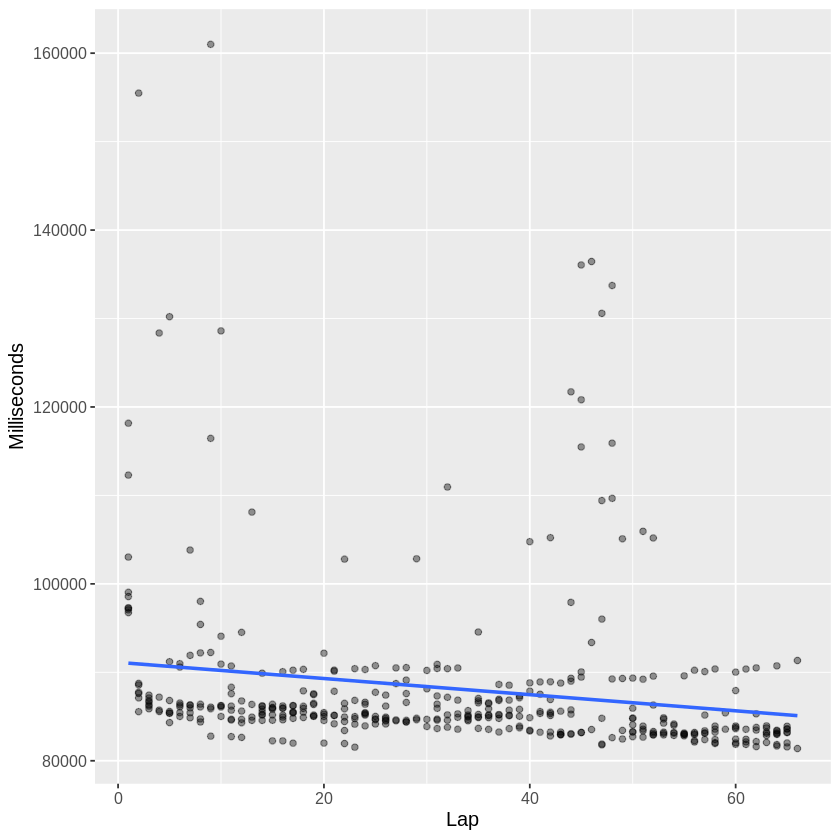

In [10]:
set.seed(2022)

#6. Spain

zg_spain <- romeo_lap %>%
                filter(raceId %in% spain_race_ID) 

zg_spain_clean <- zg_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_spain_clean
zg_spain_clean_ID <- zg_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_spain_races <- romeo_lap %>%
                    filter(raceId %in% zg_spain_clean_ID)

formulaone_split <- initial_split(zg_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

## GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,230
1056,154
974,78
994,78
953,10


`geom_smooth()` using formula 'y ~ x'



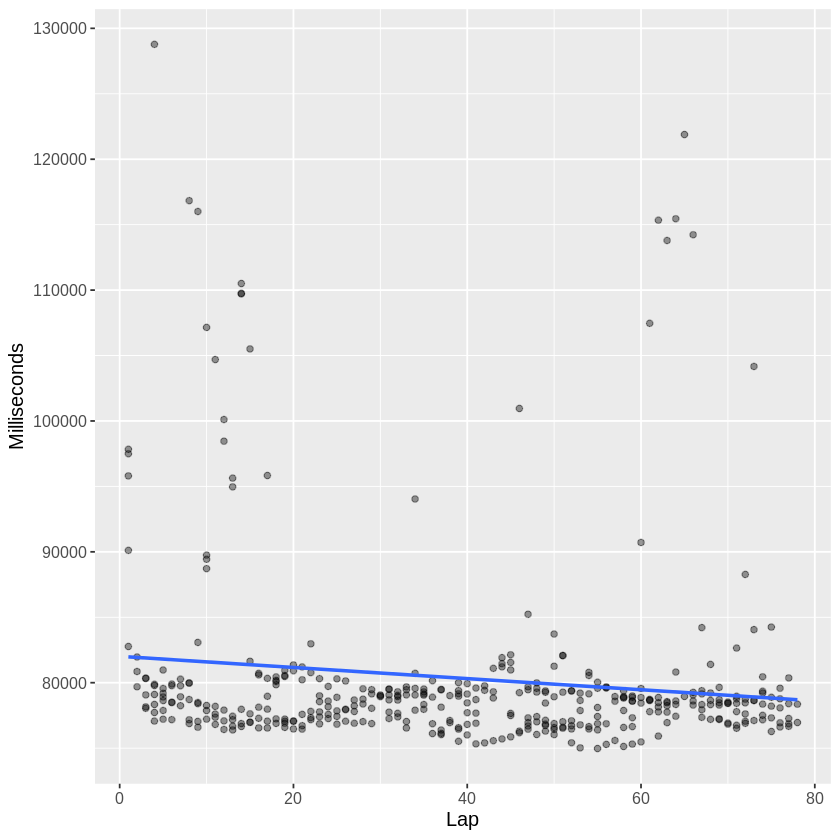

In [11]:
set.seed(2022)

#7. Monaco

zg_monaco <- romeo_lap %>%
                filter(raceId %in% monaco_race_ID) 

zg_monaco_clean <- zg_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_monaco_clean
zg_monaco_clean_ID <- zg_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_monaco_races <- romeo_lap %>%
                    filter(raceId %in% zg_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:3000)

formulaone_split <- initial_split(zg_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

## GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,149
1057,102
955,51
992,51
976,46


`geom_smooth()` using formula 'y ~ x'



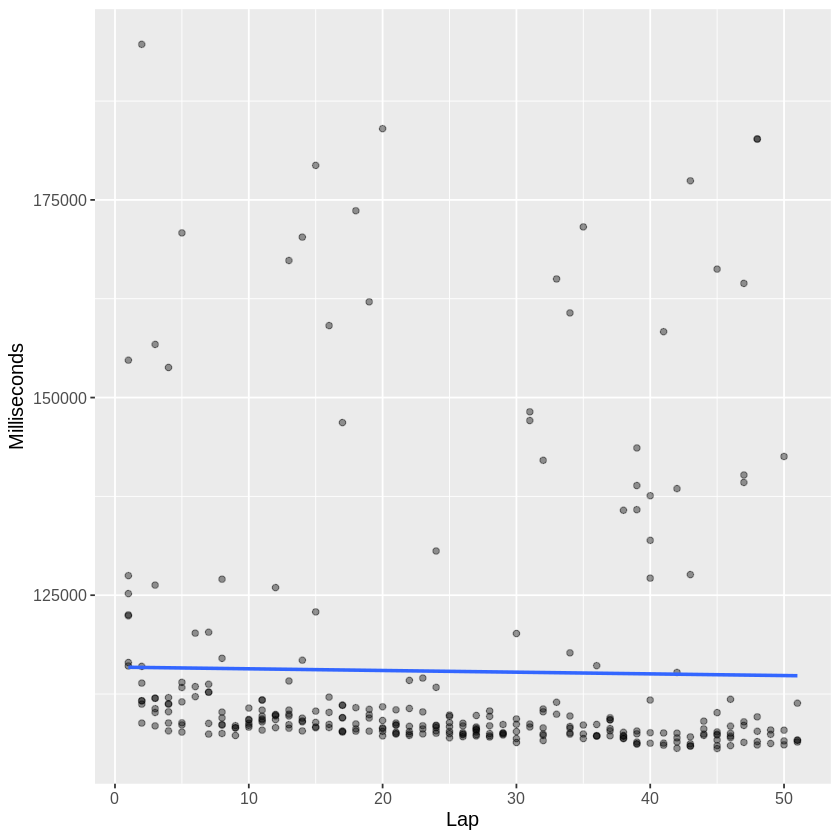

In [12]:
set.seed(2022)

#8. Azerbaijan

zg_azerbaijan <- romeo_lap %>%
                filter(raceId %in% azerbaijan_race_ID) 

zg_azerbaijan_clean <- zg_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_azerbaijan_clean
zg_azerbaijan_clean_ID <- zg_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_azerbaijan_races <- romeo_lap %>%
                    filter(raceId %in% zg_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(zg_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

## GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,205
954,70
975,70
995,68


`geom_smooth()` using formula 'y ~ x'



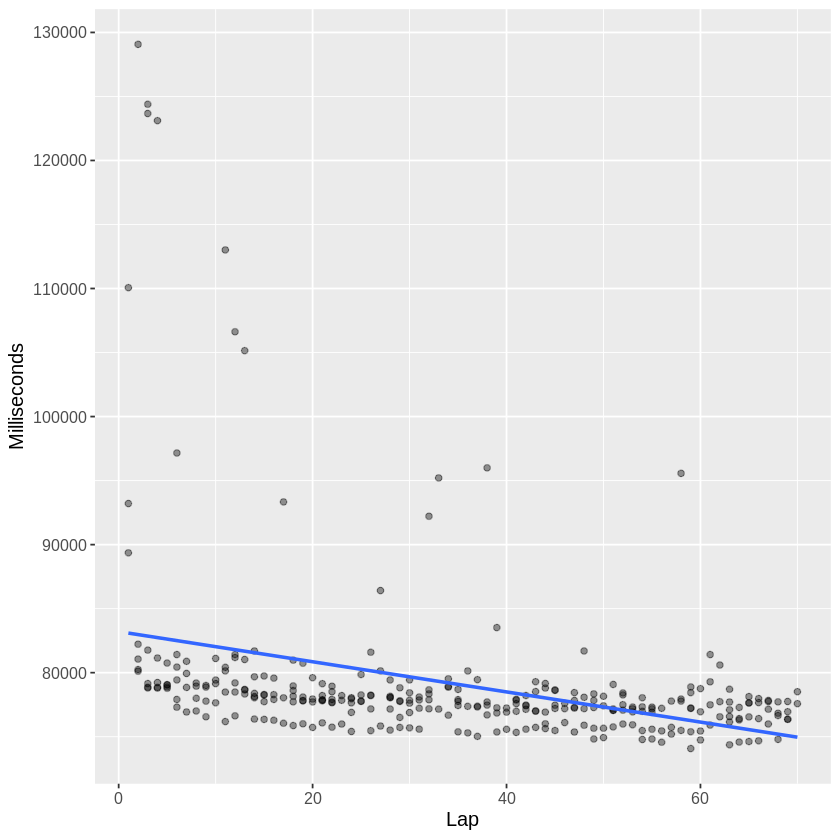

In [13]:
set.seed(2022)

#9. Canada

zg_canada <- romeo_lap %>%
                filter(raceId %in% canada_race_ID) 

zg_canada_clean <- zg_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_canada_clean
zg_canada_clean_ID <- zg_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_canada_races <- romeo_lap %>%
                    filter(raceId %in% zg_canada_clean_ID)

formulaone_split <- initial_split(zg_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

## GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1019,121
1034,103
1035,102
1061,102
957,52
998,52
978,51


`geom_smooth()` using formula 'y ~ x'



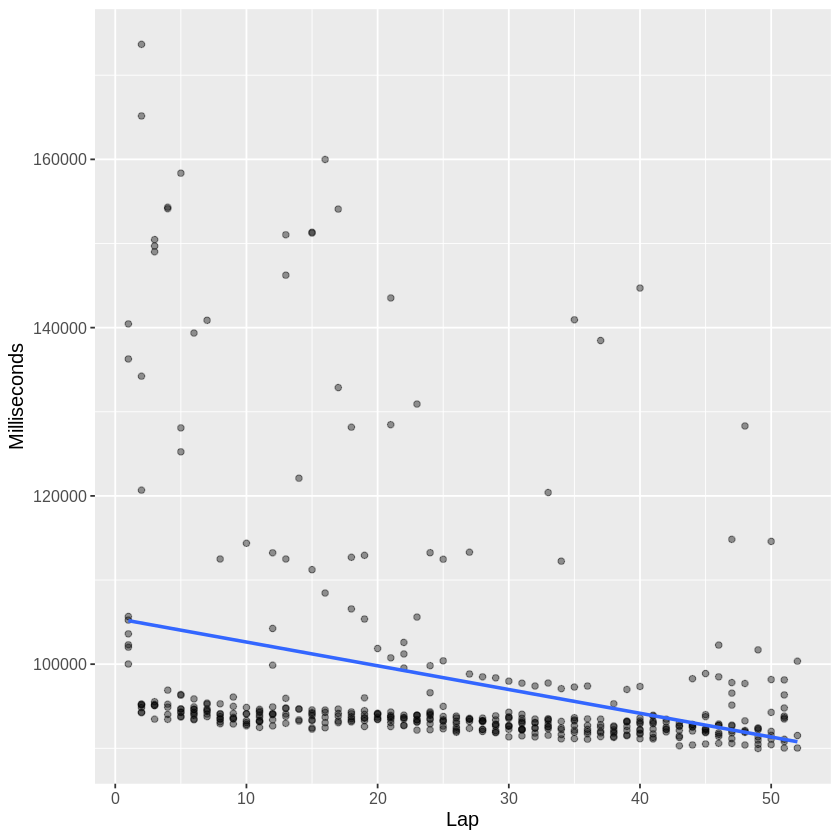

In [14]:
set.seed(2022)

#10. Great Britain

zg_uk <- romeo_lap %>%
                filter(raceId %in% uk_race_ID) 

zg_uk_clean <- zg_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_uk_clean
zg_uk_clean_ID <- zg_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_uk_races <- romeo_lap %>%
                    filter(raceId %in% zg_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:2000)

formulaone_split <- initial_split(zg_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

## GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



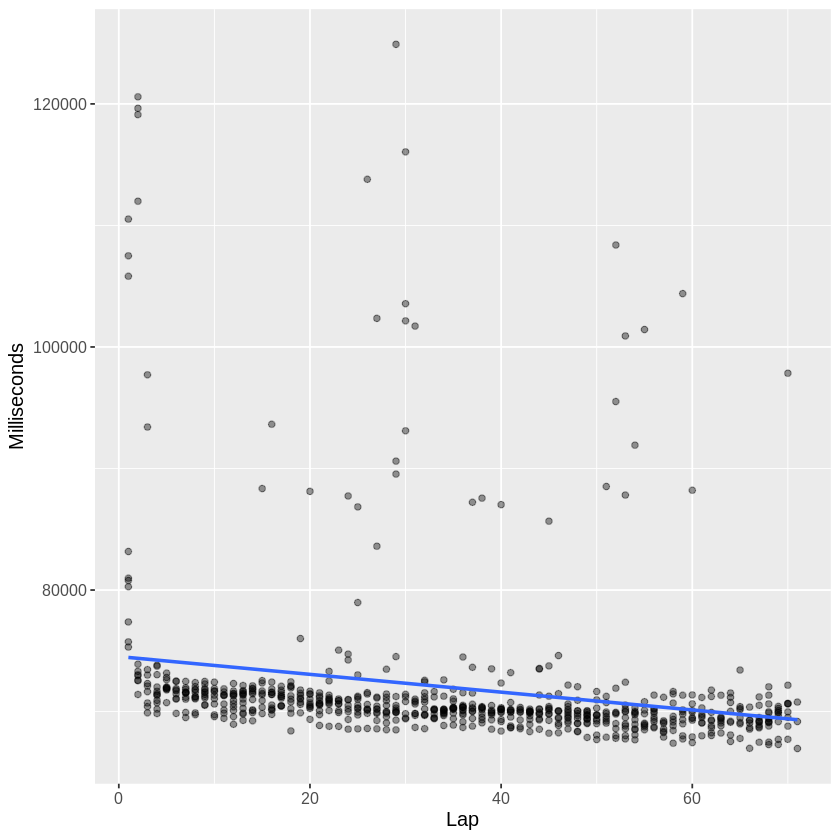

In [15]:
set.seed(2022)

#11. Austria

zg_austria <- romeo_lap %>%
                filter(raceId %in% austria_race_ID) 

zg_austria_clean <- zg_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

zg_austria_clean_ID <- zg_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_austria_races <- romeo_lap %>%
                    filter(raceId %in% zg_austria_clean_ID)

formulaone_split <- initial_split(zg_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

## GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1017,155
1059,104
996,53


`geom_smooth()` using formula 'y ~ x'



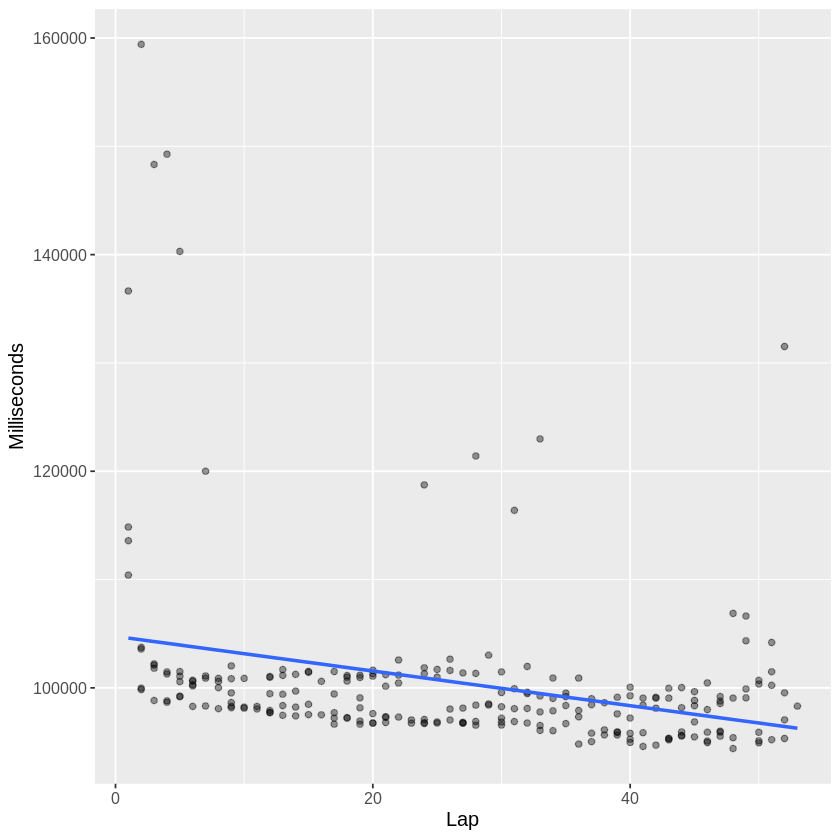

In [16]:
set.seed(2022)

#12. France

zg_france <- romeo_lap %>%
                filter(raceId %in% france_race_ID) 

zg_france_clean <- zg_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_france_clean
zg_france_clean_ID <- zg_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_france_races <- romeo_lap %>%
                    filter(raceId %in% zg_france_clean_ID)

formulaone_split <- initial_split(zg_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

## GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1021,204
1033,138
1062,138
958,70
979,70
1000,70


`geom_smooth()` using formula 'y ~ x'



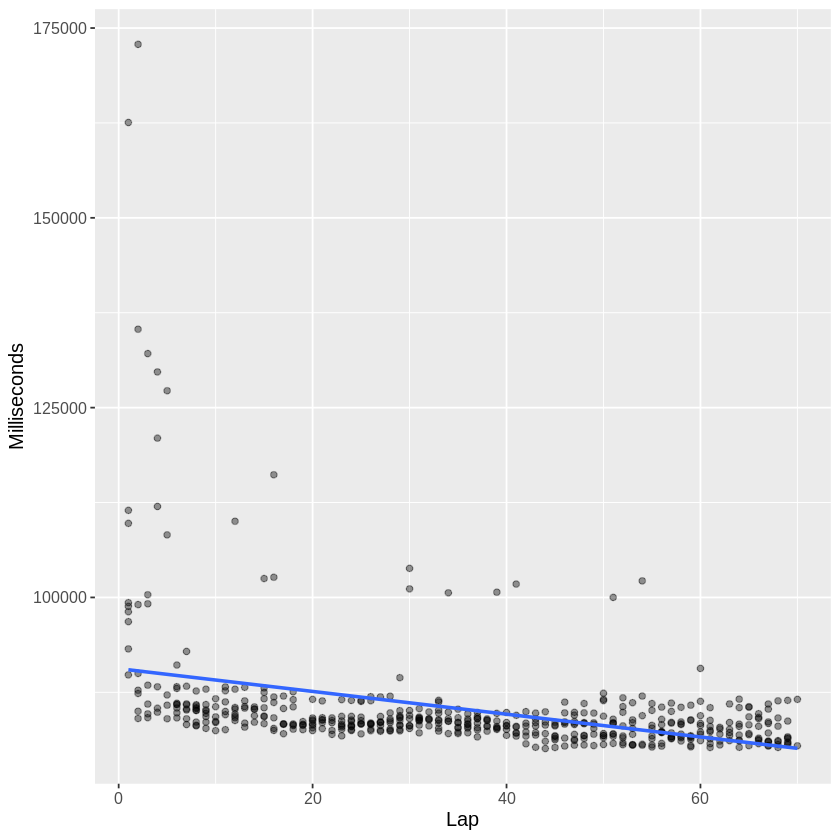

In [17]:
set.seed(2022)

#13. Hungary

zg_hungary <- romeo_lap %>%
                filter(raceId %in% hungary_race_ID) 

zg_hungary_clean <- zg_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
zg_hungary_clean
zg_hungary_clean_ID <- zg_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_hungary_races <- romeo_lap %>%
                    filter(raceId %in% zg_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

## GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1022,128
1037,53
960,44
980,44
1001,8
1063,2


`geom_smooth()` using formula 'y ~ x'



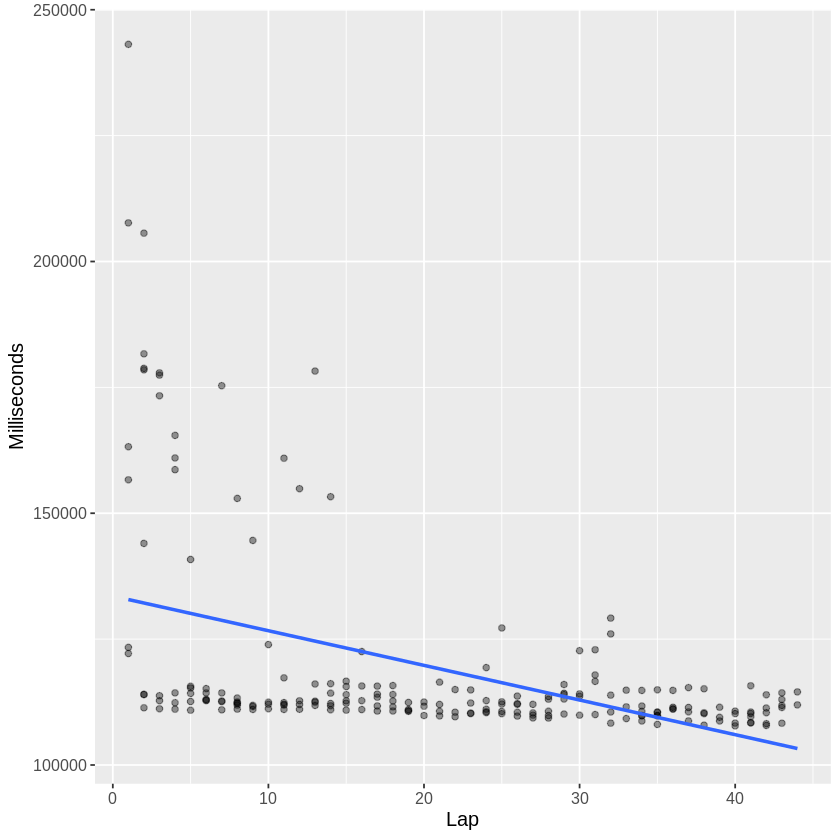

In [18]:
set.seed(2022)

#14. Belgium

zg_belgium <- romeo_lap %>%
                filter(raceId %in% belgium_race_ID) 

zg_belgium_clean <- zg_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_belgium_clean
zg_belgium_clean_ID <- zg_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_belgium_races <- romeo_lap %>%
                    filter(raceId %in% zg_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,140


`geom_smooth()` using formula 'y ~ x'



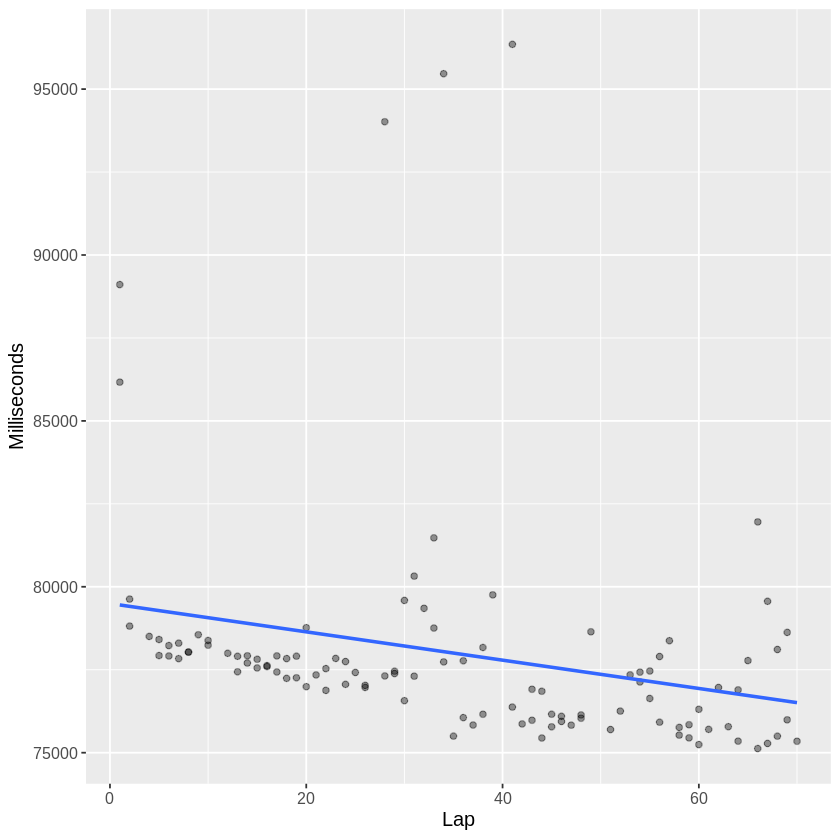

In [19]:
set.seed(2022)

#15. Netherlands

zg_netherlands <- romeo_lap %>%
                filter(raceId %in% netherlands_race_ID) 

zg_netherlands_clean <- zg_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_netherlands_clean
zg_netherlands_clean_ID <- zg_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_netherlands_races <- romeo_lap %>%
                    filter(raceId %in% zg_netherlands_clean_ID)

formulaone_split <- initial_split(zg_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

## GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1023,155
1038,106
1065,106
961,53
981,53
1002,53


`geom_smooth()` using formula 'y ~ x'



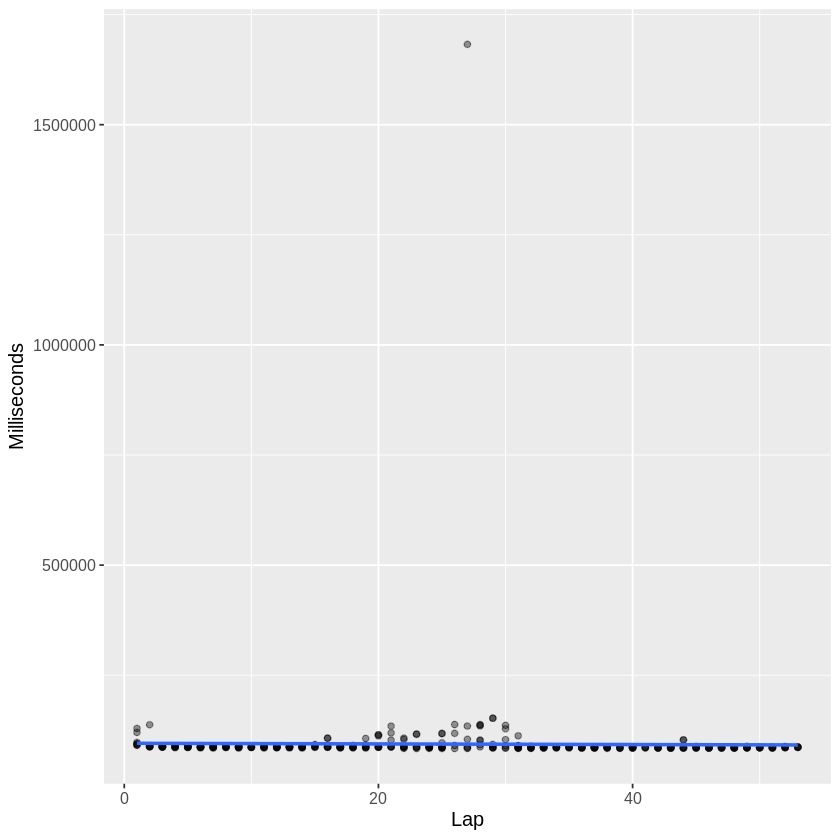

In [20]:
set.seed(2022)

#16. Italy, Monza

zg_monza <- romeo_lap %>%
                filter(raceId %in% monza_race_ID) 

zg_monza_clean <- zg_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_monza_clean
zg_monza_clean_ID <- zg_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_monza_races <- romeo_lap %>%
                    filter(raceId %in% zg_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

## GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,171
962,61
1003,61


`geom_smooth()` using formula 'y ~ x'



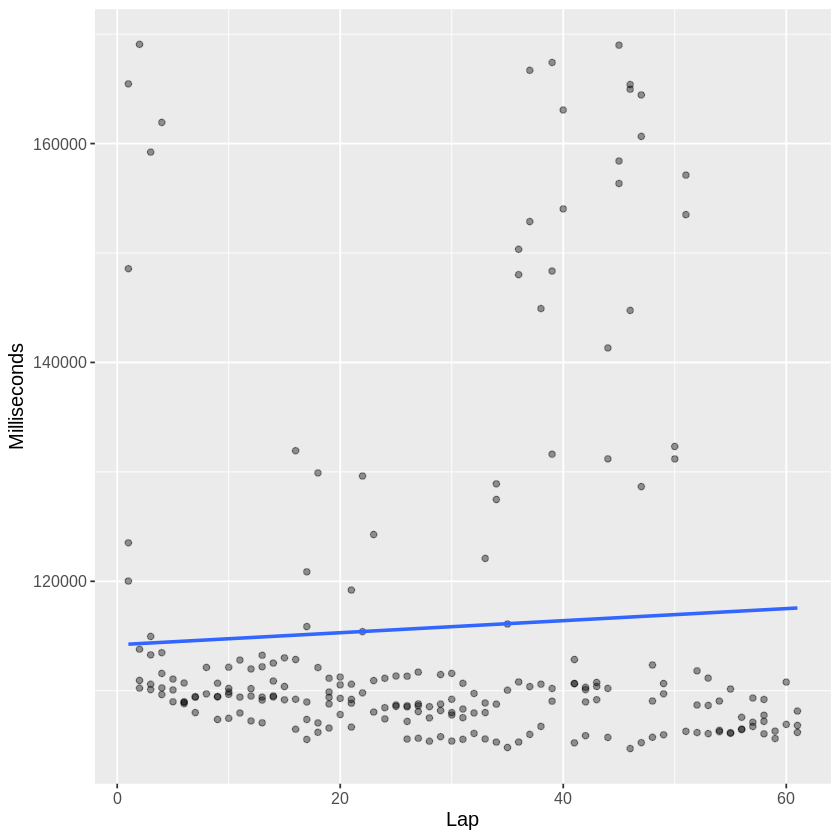

In [21]:
set.seed(2022)

#17. Singapore

zg_singapore <- romeo_lap %>%
                filter(raceId %in% singapore_race_ID) 

zg_singapore_clean <- zg_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_singapore_clean
zg_singapore_clean_ID <- zg_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_singapore_races <- romeo_lap %>%
                    filter(raceId %in% zg_singapore_clean_ID)

formulaone_split <- initial_split(zg_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1026,152
964,53
984,53
1005,53


`geom_smooth()` using formula 'y ~ x'



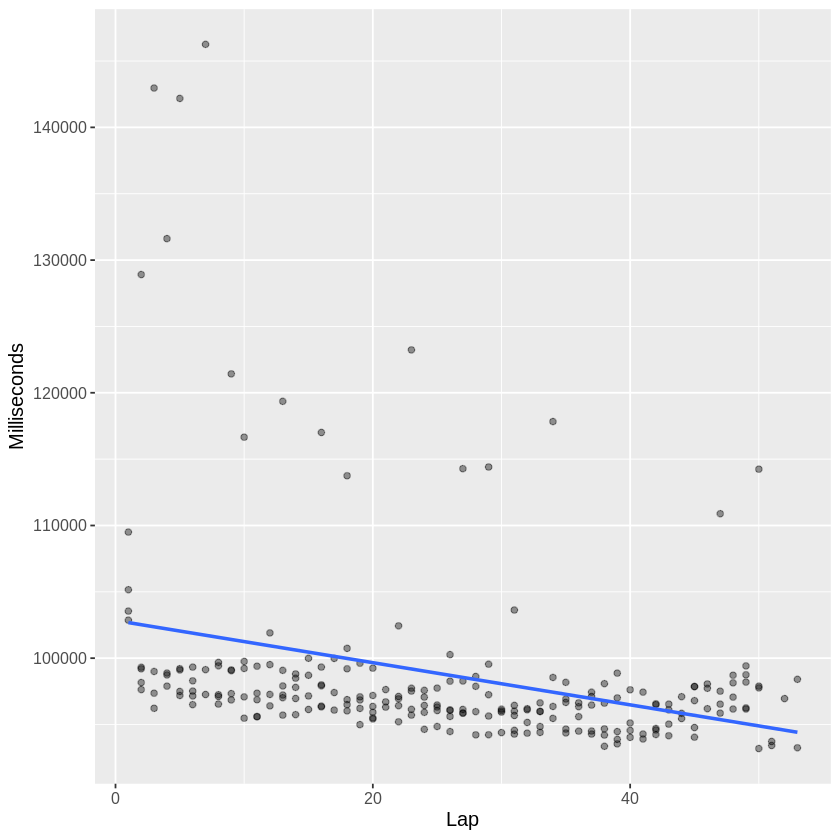

In [22]:
set.seed(2022)

#18. Japan

zg_japan <- romeo_lap %>%
                filter(raceId %in% japan_race_ID) 

zg_japan_clean <- zg_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_japan_clean
zg_japan_clean_ID <- zg_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_japan_races <- romeo_lap %>%
                    filter(raceId %in% zg_japan_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1028,141
1069,110
985,56
1006,56
965,38


`geom_smooth()` using formula 'y ~ x'



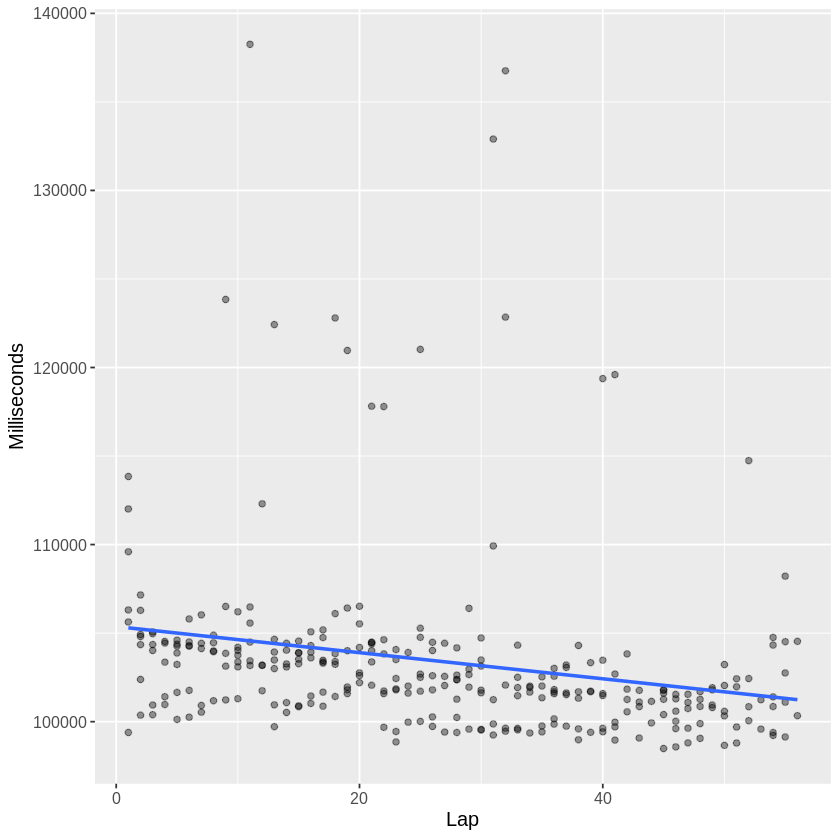

In [23]:
set.seed(2022)

#19. USA, Austin

zg_austin <- romeo_lap %>%
                filter(raceId %in% austin_race_ID) 

zg_austin_clean <- zg_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_austin_clean
zg_austin_clean_ID <- zg_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_austin_races <- romeo_lap %>%
                    filter(raceId %in% zg_austin_clean_ID)

formulaone_split <- initial_split(zg_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

## GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



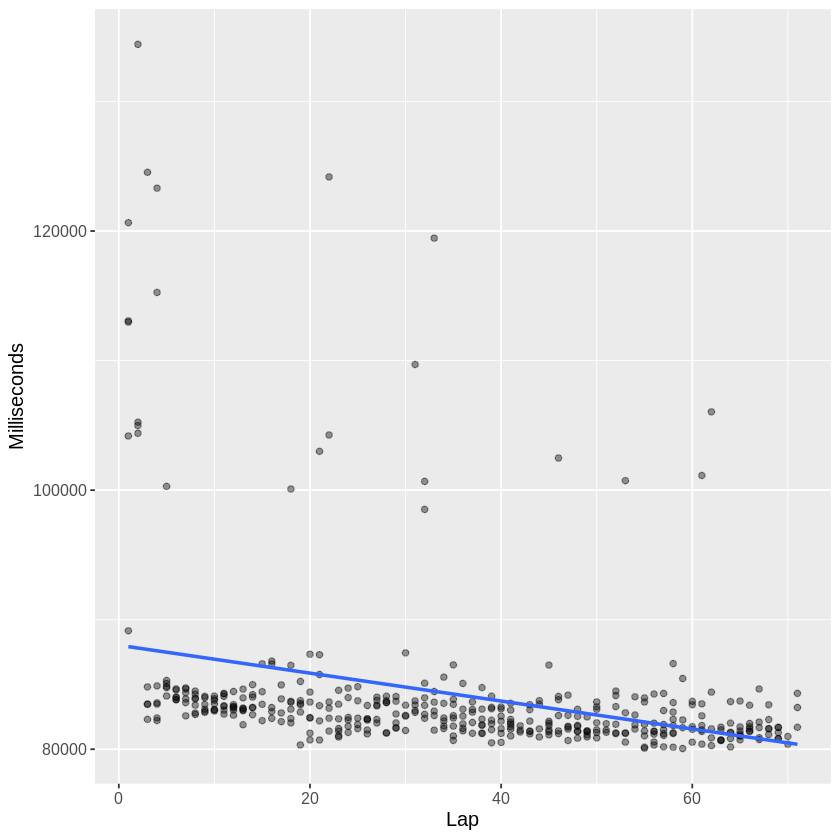

In [24]:
set.seed(2022)

#20. Mexico

zg_mexico <- romeo_lap %>%
                filter(raceId %in% mexico_race_ID) 

zg_mexico_clean <- zg_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

zg_mexico_clean_ID <- zg_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_mexico_races <- romeo_lap %>%
                    filter(raceId %in% zg_mexico_clean_ID)

formulaone_split <- initial_split(zg_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1029,212
1071,140
987,71
1008,71
967,19


`geom_smooth()` using formula 'y ~ x'



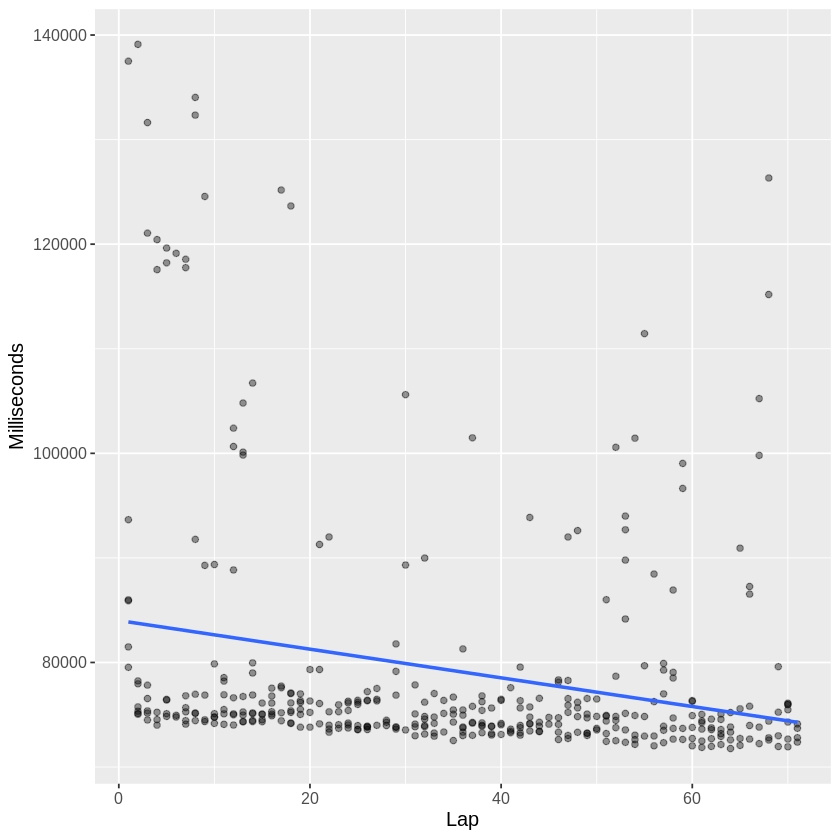

In [25]:
set.seed(2022)

#21. Brazil

zg_brazil <- romeo_lap %>%
                filter(raceId %in% brazil_race_ID) 

zg_brazil_clean <- zg_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_brazil_clean
zg_brazil_clean_ID <- zg_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_brazil_races <- romeo_lap %>%
                    filter(raceId %in% zg_brazil_clean_ID)

formulaone_split <- initial_split(zg_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

## GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1030,161
1047,108
968,55
988,55
1009,6


`geom_smooth()` using formula 'y ~ x'



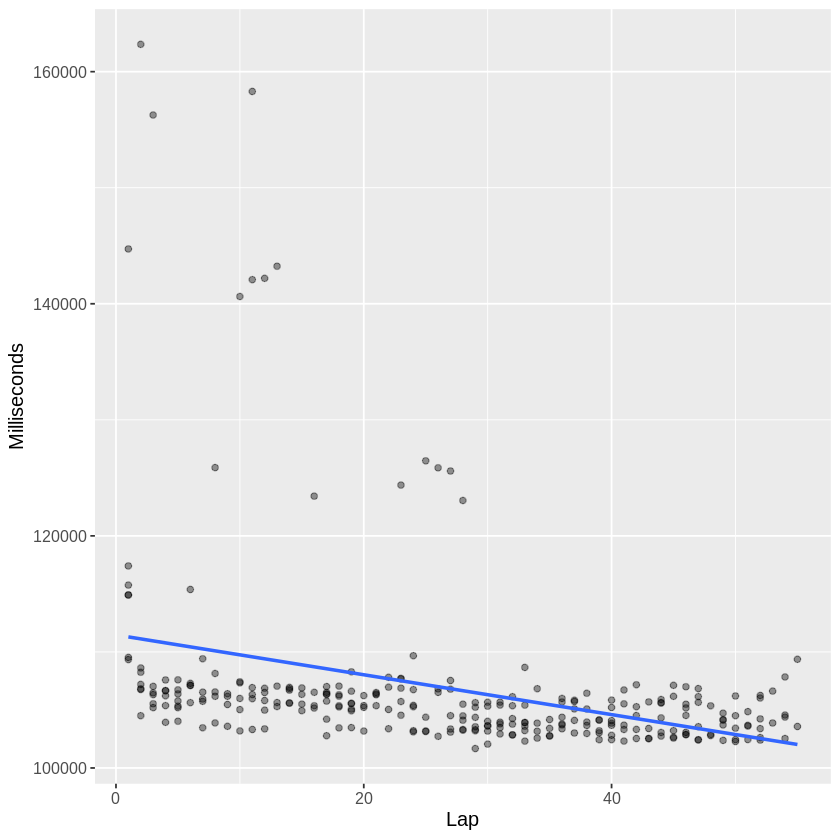

In [26]:
set.seed(2022)

#22. Abu Dhabi

zg_uae <- romeo_lap %>%
                filter(raceId %in% uae_race_ID) 

zg_uae_clean <- zg_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_uae_clean
zg_uae_clean_ID <- zg_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_uae_races <- romeo_lap %>%
                    filter(raceId %in% zg_uae_clean_ID)

formulaone_split <- initial_split(zg_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

## GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

zg_merge <- merge(rmse_col, racetime_col)

zg_merge

write_csv(zg_merge, "final_race_data/zg_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,14317.896,1
rmse,standard,12403.730,2
rmse,standard,6963.927,3
rmse,standard,17466.477,4
rmse,standard,9892.404,5
rmse,standard,9546.831,6
rmse,standard,8936.378,7
rmse,standard,13922.384,8
rmse,standard,6464.418,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5922126,98.70211,1.645035,1
5556664,92.61107,1.543518,2
5332088,88.86813,1.481136,3
5648278,94.13797,1.568966,4
5779828,96.33047,1.605508,5
5812417,96.87362,1.614560,6
6266216,104.43694,1.740616,7
5882748,98.04580,1.634097,8
5531920,92.19866,1.536644,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,14317.896,5922126,98.70211,1.645035
2,rmse,standard,12403.730,5556664,92.61107,1.543518
3,rmse,standard,6963.927,5332088,88.86813,1.481136
4,rmse,standard,17466.477,5648278,94.13797,1.568966
5,rmse,standard,9892.404,5779828,96.33047,1.605508
6,rmse,standard,9546.831,5812417,96.87362,1.614560
7,rmse,standard,8936.378,6266216,104.43694,1.740616
8,rmse,standard,13922.384,5882748,98.04580,1.634097
9,rmse,standard,6464.418,5531920,92.19866,1.536644
